In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import linregress as LR
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",200)

In [2]:
#make a chronic patient table for this subset of conditions

# read in that pre-made table
df=pd.read_csv("../data_files/chronic_patients.csv")

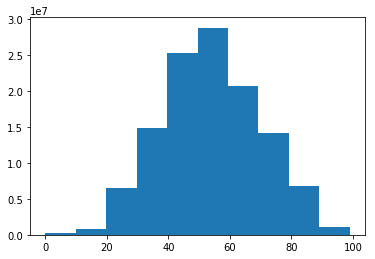

In [3]:
#make histograms showing ages of chronic patients receiving opiates vs all patients receiving opiates

opiates = df[df.received == 1]
chronic_opiates = opiates[opiates.chronic == 1]

#must multiply visits by patient weight (patwt)
op_wts = np.array(opiates.PATWT)
chronic_wts = np.array(chronic_opiates.PATWT)

chronic_ages = np.array(chronic_opiates.AGE)

plt.hist(chronic_ages, weights=chronic_wts, bins=10)
plt.show()

In [4]:
print(opiates.shape, chronic_opiates.shape)

(19064, 29) (4195, 29)


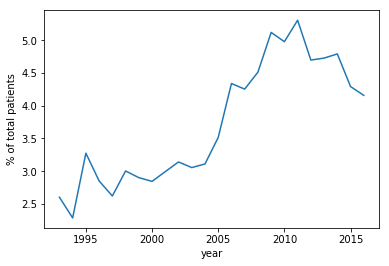

In [5]:
year_data_tot= []
year_data_chron= []
chron = df[df.chronic == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = opiates.loc[(opiates['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")
plt.xlabel("year")
plt.ylabel("% of total patients")
plt.show()
#% of TOTAL (not just opiates) patients prescribed opiates(opiates/all)

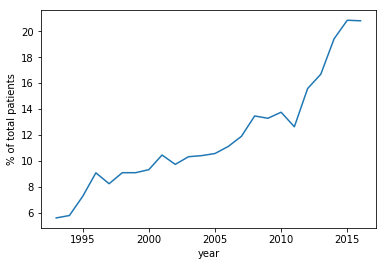

In [7]:
year_data_tot= []
year_data_chron= []
chron = df[df.chronic == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")
plt.xlabel("year")
plt.ylabel("% of total patients")
plt.show()
#% of TOTAL (not just opiates) patients diagnosed with some chronic condition (chronic/all)

-0.41991185849544754
-1.4762664969771107


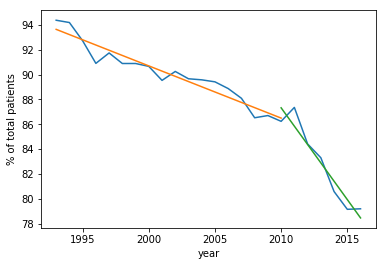

In [8]:
year_data_tot= []
year_data_chron= []
chron = df[df.chronic == 0]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")


m, b = np.polyfit(years[:18], year_data_tot[:18], 1)
plt.plot(years[:18], m*years[:18] + b, label="to 2010")
print(m)


m, b = np.polyfit(years[17:], year_data_tot[17:], 1)
plt.plot(years[17:], m*years[17:] + b, label="since 2010")
print(m)

plt.xlabel("year")
plt.ylabel("% of total patients")
plt.show()
#% of TOTAL (not just opiates) patients diagnosed with NO chronic condition (~chronic/all)

0.41991185849544854
1.4762664969771102


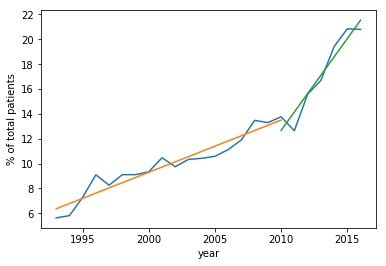

In [9]:
year_data_tot= []
year_data_chron= []
chron = df[df.chronic == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = df.loc[(df['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot)


m, b = np.polyfit(years[:18], year_data_tot[:18], 1)
plt.plot(years[:18], m*years[:18] + b, label="to 2010")
print(m)


m, b = np.polyfit(years[17:], year_data_tot[17:], 1)
plt.plot(years[17:], m*years[17:] + b, label="since 2010")
print(m)


plt.xlabel("year")
plt.ylabel("% of total patients")
plt.show()
#% of TOTAL (not just opiates) patients diagnosed with some chronic condition (chronic/all)

1.3178972462479719


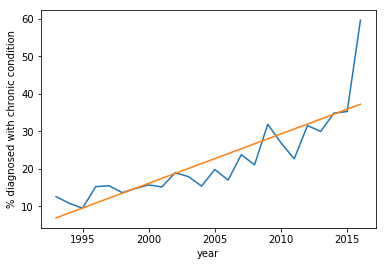

In [10]:
year_data_tot= []
year_data_chron= []
tmp = df[df.received == 1]
chron = tmp[tmp.chronic == 1]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = tmp.loc[(tmp['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")

m, b = np.polyfit(years, year_data_tot, 1)
plt.plot(years, m*years + b, label="all years")
print(m)
plt.xlabel("year")
plt.ylabel("% diagnosed with chronic condition")
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with chronic conditions, with regression
#chronic opiates/opiates

-1.3178972462479723


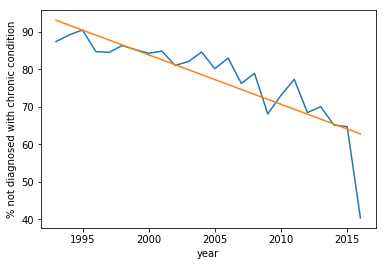

In [11]:
year_data_tot= []
year_data_chron= []
tmp = df[df.received == 1]
chron = tmp[tmp.chronic == 0]
for year in range(1993, 2017):
    col = 'RACE'
    tmp_total = tmp.loc[(tmp['YEAR'] == year)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    
    tmp_chron = chron.loc[(chron['YEAR'] == year)]
    tmp_chron = tmp_chron[tmp_chron[col].notnull()]
    op_wts = np.sum(tmp_chron.PATWT)
    
    year_data_tot.append(op_wts/tot_wts*100)

years = np.arange(1993, 2017)
plt.plot(years, year_data_tot, label="total")

m, b = np.polyfit(years, year_data_tot, 1)
plt.plot(years, m*years + b, label="all years")
print(m)
plt.xlabel("year")
plt.ylabel("% not diagnosed with chronic condition")
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with chronic conditions, with regression
#chronic opiates/opiates

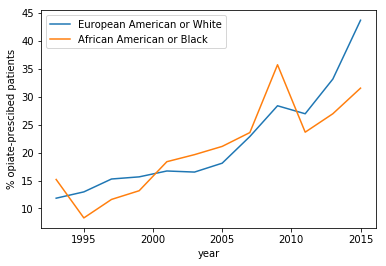

In [12]:
'''
1 = White          
2 = Black
these are the only races consistant across years
'''
year_data_white= []
year_data_black= []
year_data_other= []
for year in range(1993, 2017, 2):
    
    col = 'RACE'
    tmp_total = opiates.loc[(opiates['YEAR'] == year) | (opiates['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_white = tmp_total[tmp_total[col] == 1]
    white_wts = np.sum(tot_white.PATWT)
    tot_black = tmp_total[tmp_total[col] == 2]
    black_wts = np.sum(tot_black.PATWT)
    tot_other = tmp_total[(tmp_total[col] != 1) & (tmp_total[col] != 2)]
    oth_wts = np.sum(tot_other.PATWT)
    
    tmp_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year) | (chronic_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_white = tmp_opiates[tmp_opiates[col] == 1]
    op_white_wts = np.sum(op_white.PATWT)
    op_black = tmp_opiates[tmp_opiates[col] == 2]
    op_black_wts = np.sum(op_black.PATWT)
    op_other = tmp_opiates[(tmp_opiates[col] != 1) & (tmp_opiates[col] != 2)]
    op_other_wts = np.sum(op_other.PATWT)
    
    
    year_data_white.append(op_white_wts/white_wts*100)
    year_data_black.append(op_black_wts/black_wts*100)
    year_data_other.append(op_other_wts/oth_wts*100)

years = np.arange(1993, 2017,2)
plt.plot(years, year_data_white, label="European American or White")
plt.plot(years, year_data_black, label="African American or Black")

plt.xlabel("year")
plt.ylabel("% opiate-prescibed patients")
plt.legend()
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with chronic conditions, by race

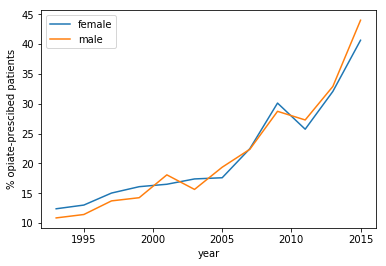

In [13]:
'''
1 = Female          
2 = Male
these are the only races consistant across years
'''
year_data_f= []
year_data_m= []
for year in range(1993, 2017,2):
    col = 'SEX'
    tmp_total = opiates.loc[(opiates['YEAR'] == year) | (opiates['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_f = tmp_total[tmp_total[col] == 1]
    f_wts = np.sum(tot_f.PATWT)
    tot_m = tmp_total[tmp_total[col] == 2]
    m_wts = np.sum(tot_m.PATWT)
    
    tmp_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year) | (chronic_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_f = tmp_opiates[tmp_opiates[col] == 1]
    op_f_wts = np.sum(op_f.PATWT)
    op_m = tmp_opiates[tmp_opiates[col] == 2]
    op_m_wts = np.sum(op_m.PATWT)
    
    
    year_data_f.append(op_f_wts/f_wts*100)
    year_data_m.append(op_m_wts/m_wts*100)

years = np.arange(1993, 2017,2)
plt.plot(years, year_data_f, label="female")
plt.plot(years, year_data_m, label="male")

plt.xlabel("year")
plt.ylabel("% opiate-prescibed patients")
plt.legend()
plt.show()
#This plot is showing what percentage of OPIATE-PRESCRIBED patients were diagnosed with chronic conditions, with regression
#chronic opiates/opiates, by gender

0.0206502860680449
0.9680037198567805
-0.412636619910987


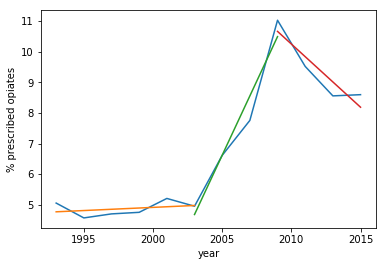

In [14]:
chronic_opiates = opiates[opiates.chronic == 1]
chron = df[df.chronic == 1]

year_data_tot= []
year_data_chron= []
lens = []
for year in range(1993, 2017,2):
    col = 'RACE'
    
    tmp_opiates = chron.loc[(chron['YEAR'] == year)| (chron['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_wts = np.sum(tmp_opiates.PATWT)
    
    tmp_chron_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year) |(chronic_opiates['YEAR'] == year+1)]
    tmp_chron_opiates = tmp_chron_opiates[tmp_chron_opiates[col].notnull()]
    ch_op_wts = np.sum(tmp_chron_opiates.PATWT)
    
    lens.append(len(tmp_chron_opiates.PATWT))
    
    year_data_chron.append(ch_op_wts/op_wts*100)

years = np.arange(1993, 2017,2)
plt.plot(years, year_data_chron)

plt.xlabel("year")
plt.ylabel("% prescribed opiates")

m, b = np.polyfit(years[:6], year_data_chron[:6], 1)
plt.plot(years[:6], m*years[:6] + b,label='1')
print(m)

m, b = np.polyfit(years[5:-3], year_data_chron[5:-3], 1)
plt.plot(years[5:-3], m*years[5:-3] + b,label='2')
print(m)

m, b = np.polyfit(years[-4:], year_data_chron[-4:], 1)
plt.plot(years[-4:], m*years[-4:] + b,label='3')
print(m)

plt.show()
#This plot is showing what percentage of chronic patients were prescribed opiates, with regression
#chronic opiates/chronic

[382, 396, 607, 1261, 972] [39, 49, 74, 183, 103] [9, 15, 17, 53, 35]


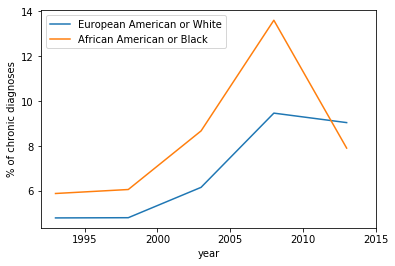

In [16]:
'''
1 = White          
2 = Black
these are the only races consistant across years
'''
year_data_white= []
year_data_black= []
year_data_other= []
lenw,lenb,lens=[],[],[]
chron = df[df.chronic ==1]

for year in range(1993, 2017, 5):
    col = 'RACE'
    tmp_total = chron.loc[(chron['YEAR'] == year) | (chron['YEAR'] == year+1) | (chron['YEAR'] == year+2) | (chron['YEAR'] == year+3) | (chron['YEAR'] == year+4)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_white = tmp_total[tmp_total[col] == 1]
    white_wts = np.sum(tot_white.PATWT)
    tot_black = tmp_total[tmp_total[col] == 2]
    black_wts = np.sum(tot_black.PATWT)
    tot_other = tmp_total[(tmp_total[col] != 1) & (tmp_total[col] != 2)]
    oth_wts = np.sum(tot_other.PATWT)
    
    tmp_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year) | (chronic_opiates['YEAR'] == year+1) | (chronic_opiates['YEAR'] == year+2) | (chronic_opiates['YEAR'] == year+3) | (chronic_opiates['YEAR'] == year+4)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_white = tmp_opiates[tmp_opiates[col] == 1]
    op_white_wts = np.sum(op_white.PATWT)
    op_black = tmp_opiates[tmp_opiates[col] == 2]
    op_black_wts = np.sum(op_black.PATWT)
    op_other = tmp_opiates[(tmp_opiates[col] != 1) & (tmp_opiates[col] != 2)]
    op_other_wts = np.sum(op_other.PATWT)
    
    lenw.append(len(op_white.PATWT))
    lenb.append(len(op_black.PATWT))
    lens.append(len(op_other.PATWT))
    
    year_data_white.append(op_white_wts/white_wts*100)
    year_data_black.append(op_black_wts/black_wts*100)
    year_data_other.append(op_other_wts/oth_wts*100)

years = np.arange(1993, 2017,5)
print(lenw,lenb,lens)
plt.plot(years, year_data_white, label="European American or White")
plt.plot(years, year_data_black, label="African American or Black")
plt.xlim(1992,2015)
plt.xlabel("year")
plt.ylabel("% of chronic diagnoses")
plt.legend()
plt.show()
#This plot is showing what percentage of chronic patients were prescribed opiates, with regression
#chronic opiates/opiates, by race, by 5-year increments

[95, 112, 93, 92, 138, 135, 163, 229, 296, 471, 481, 133] [56, 91, 57, 71, 85, 82, 125, 136, 213, 345, 386, 110]


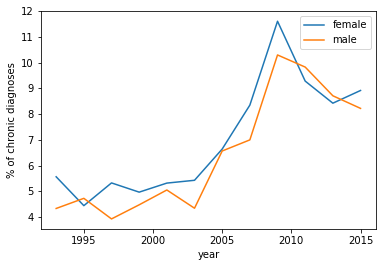

In [17]:
'''
1 = Female          
2 = Male
these are the only races consistant across years
'''
year_data_f= []
year_data_m= []
lenf,lenm=[],[]
chron = df[df.chronic ==1]
for year in range(1993, 2017,2):
    col = 'SEX'
    tmp_total = chron.loc[(chron['YEAR'] == year) | (chron['YEAR'] == year+1)]
    tmp_total = tmp_total[tmp_total[col].notnull()]
    tot_wts = np.sum(tmp_total.PATWT)
    tot_f = tmp_total[tmp_total[col] == 1]
    f_wts = np.sum(tot_f.PATWT)
    tot_m = tmp_total[tmp_total[col] == 2]
    m_wts = np.sum(tot_m.PATWT)
    
    tmp_opiates = chronic_opiates.loc[(chronic_opiates['YEAR'] == year) | (chronic_opiates['YEAR'] == year+1)]
    tmp_opiates = tmp_opiates[tmp_opiates[col].notnull()]
    op_f = tmp_opiates[tmp_opiates[col] == 1]
    op_f_wts = np.sum(op_f.PATWT)
    op_m = tmp_opiates[tmp_opiates[col] == 2]
    op_m_wts = np.sum(op_m.PATWT)
    
    lenf.append(len(op_f.PATWT))
    lenm.append(len(op_m.PATWT))
    
    year_data_f.append(op_f_wts/f_wts*100)
    year_data_m.append(op_m_wts/m_wts*100)

years = np.arange(1993, 2017,2)
print(lenf,lenm)
plt.plot(years, year_data_f, label="female")
plt.plot(years, year_data_m, label="male")

plt.xlabel("year")
plt.ylabel("% of chronic diagnoses")
plt.legend()
plt.show()
#This plot is showing what percentage of chronic patients were prescribed opiates, with regression
#chronic opiates/opiates, by gender, by 2-year increments

chronic


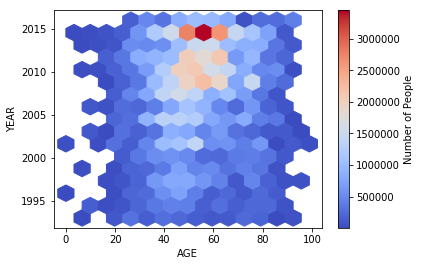

all


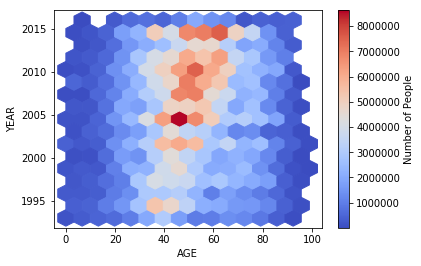

chronic opiate receiviers


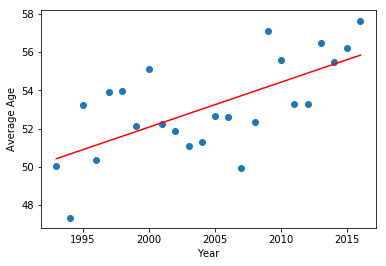

0.23558698353908214
all opiate receivers
0.32643446404640397


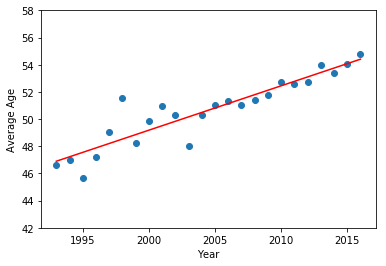

In [20]:
print("chronic")
chronic_opiates.plot(kind="Hexbin", x="AGE", y="YEAR",C='PATWT',reduce_C_function=np.sum, cmap='coolwarm', gridsize=15,sharex=False)#title='Distribution of Chronic patients Receiving Opiates',

#Labeling Colobar
label = plt.gcf()
cax = label.get_axes()[1]
cax.set_ylabel('Number of People')
plt.show()

print("all")

opiates.plot(kind="Hexbin", x="AGE", y="YEAR",C='PATWT',reduce_C_function=np.sum, cmap='coolwarm', gridsize=15,sharex=False)#title='Distribution of Chronic patients Receiving Opiates',

#Labeling Colorbar
label = plt.gcf()
cax = label.get_axes()[1]
cax.set_ylabel('Number of People')
plt.show()


print('chronic opiate receiviers')
#for chronic opiates
average_age = chronic_opiates.groupby("YEAR")
holder = []
yrs = []
for k, yr in average_age:
    yrs.append(k)
    holder.append(sum(yr['AGE'].values*yr['PATWT'].values)/ sum(yr['PATWT'].values))
   
yrs = np.array(yrs)
slope, intercept, r_value, p_value, stdrr = LR(yrs, holder)
plt.scatter(yrs, holder, label="Chronic opiate receivers")
plt.plot(yrs, yrs*slope+intercept, color='r')
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.show()
print(slope)

print('all opiate receivers')
#for all patients
average_age = opiates.groupby("YEAR")
holder = []
yrs = []
for k, yr in average_age:
    yrs.append(k)
    holder.append(sum(yr['AGE'].values*yr['PATWT'].values)/ sum(yr['PATWT'].values))
   
yrs = np.array(yrs)
slope, intercept, r_value, p_value, stdrr = LR(yrs, holder)
plt.scatter(yrs, holder, label="All opiate receivers")
plt.plot(yrs, yrs*slope+intercept, color='r')
print(slope)

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.ylim(42,58)
plt.show()

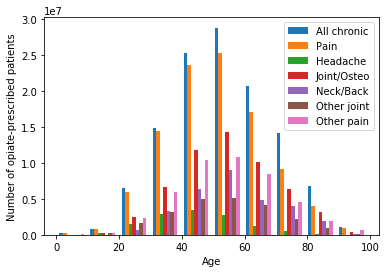

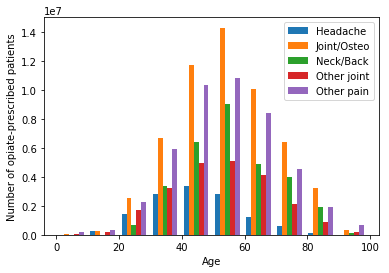

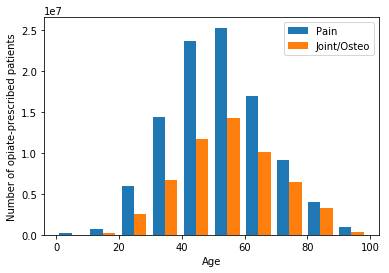

In [19]:
###############
opiates_all = df[df.received == 1]
chronic_opiates_all = opiates_all[opiates_all.chronic == 1]
chronic_opiates_pain = chronic_opiates_all[chronic_opiates_all.pain == 1]
chronic_opiates_headache = chronic_opiates_all[chronic_opiates_all.headache == 1]
chronic_opiates_joint_osteo = chronic_opiates_all[chronic_opiates_all.joint_osteo == 1]
chronic_opiates_neck_back = chronic_opiates_all[chronic_opiates_all.neck_back == 1]
chronic_opiates_other_joint = chronic_opiates_all[chronic_opiates_all.other_joint == 1]
chronic_opiates_other_pain = chronic_opiates_all[chronic_opiates_all.other_pain == 1]

#must multiply visits by patient weight (patwt)
chronic_wts_all = np.array(chronic_opiates_all.PATWT)
chronic_ages_all = np.array(chronic_opiates_all.AGE)

chronic_wts_pain = np.array(chronic_opiates_pain.PATWT)
chronic_ages_pain = np.array(chronic_opiates_pain.AGE)

chronic_wts_headache = np.array(chronic_opiates_headache.PATWT)
chronic_ages_headache = np.array(chronic_opiates_headache.AGE)

chronic_wts_joint_osteo = np.array(chronic_opiates_joint_osteo.PATWT)
chronic_ages_joint_osteo = np.array(chronic_opiates_joint_osteo.AGE)

chronic_wts_neck_back = np.array(chronic_opiates_neck_back.PATWT)
chronic_ages_neck_back = np.array(chronic_opiates_neck_back.AGE)

chronic_wts_other_joint = np.array(chronic_opiates_other_joint.PATWT)
chronic_ages_other_joint = np.array(chronic_opiates_other_joint.AGE)

chronic_wts_other_pain = np.array(chronic_opiates_other_pain.PATWT)
chronic_ages_other_pain = np.array(chronic_opiates_other_pain.AGE)

plt.hist((chronic_ages_all,chronic_ages_pain,chronic_ages_headache,chronic_ages_joint_osteo,chronic_ages_neck_back,
          chronic_ages_other_joint,chronic_ages_other_pain), 
         weights=(chronic_wts_all,chronic_wts_pain,chronic_wts_headache,chronic_wts_joint_osteo,
                 chronic_wts_neck_back,chronic_wts_other_joint,chronic_wts_other_pain),
         bins=10, label=("All chronic","Pain","Headache","Joint/Osteo","Neck/Back","Other joint","Other pain"))
plt.legend()

plt.ylabel("Number of opiate-prescribed patients")
plt.xlabel("Age")
# plt.savefig('plots/overlapping_ages.png')
plt.show()

plt.hist((chronic_ages_headache,chronic_ages_joint_osteo,chronic_ages_neck_back,
          chronic_ages_other_joint,chronic_ages_other_pain), 
         weights=(chronic_wts_headache,chronic_wts_joint_osteo,
                 chronic_wts_neck_back,chronic_wts_other_joint,chronic_wts_other_pain),
         bins=10, label=("Headache","Joint/Osteo","Neck/Back","Other joint","Other pain"))
plt.legend()

plt.ylabel("Number of opiate-prescribed patients")
plt.xlabel("Age")
plt.show()

plt.hist((chronic_ages_pain,chronic_ages_joint_osteo), 
         weights=(chronic_wts_pain,chronic_wts_joint_osteo),
         bins=10, label=("Pain","Joint/Osteo"))
plt.legend()

plt.ylabel("Number of opiate-prescribed patients")
plt.xlabel("Age")
plt.show()